# Lambda, List Comprehension and Generators

## Lambda

Forma alternativa de escrever funções. Pode ser associada a alguma variável, ou ser anônima.

Pode ser combinada com outras funções como filter(), reduce(), map()

In [54]:
my_f = lambda x: x * x
my_f(3)

9

In [51]:
my_f2 = lambda x, y: x * y
my_f2(3, 4)

12

In [55]:
# map

a = [1, 2, 3]
a_squared = list(map(my_f, a))
a_squared

[1, 4, 9]

In [58]:
# filter

a = [1, 2, 3, 4, 5, 6]
my_f3 = lambda x: x > 3

a_filtered = list(filter(my_f3, a))
a_filtered

[4, 5, 6]

In [63]:
# sort

some_list_of_dicts =[{'cccc': 10, 'aaa':5, 'bbbb': 23},
                     {'cccc': 5, 'aaa':1, 'bbbb': 34},
                     {'cccc': 43, 'aaa':2, 'bbbb': 4}]

some_list_of_dicts_sorted = sorted(some_list_of_dicts, key=lambda x: x['aaa'])
some_list_of_dicts_sorted

[{'cccc': 5, 'aaa': 1, 'bbbb': 34},
 {'cccc': 43, 'aaa': 2, 'bbbb': 4},
 {'cccc': 10, 'aaa': 5, 'bbbb': 23}]

## Comprehensions

It allows to create lists and dicts based on existing iterables.

Basic sintax for list: [expression for item in iterable]

Basic sintax for dict: {key: value. for (key, value) in iterable}

In [64]:
a = [1, 2, 3]
a_new = [ i**2 for i in a]
a_new

[1, 4, 9]

In [65]:
a_dict = {elem: elem**2 for elem in a}
a_dict

{1: 1, 2: 4, 3: 9}

## Generators vs Iterators

### Iterators

iterators are objects that can be iterated on, one element at time.

It performs lazy evaluation, what means that it requires only 1 memory location to process the value and when we are using a large dataset then, wastage of RAM space will be reduced.

In [84]:
class my_iterator:
  def __init__(self, final_n, multiplier):
    self.final_n = final_n
    self.multiplier = multiplier

  def __iter__(self):
    self.curr_n = 0 #start iterarion in zero
    return self
  
  def __next__(self):
    if self.curr_n <= self.final_n:
      multiple = self.curr_n
      self.curr_n += self.multiplier
      return multiple
    else:
      raise StopIteration

my_iter = my_iterator(10, 2)
iter(my_iter)
print(next(my_iter))
print(next(my_iter))
print(next(my_iter))

0
2
4


In [78]:
# converting a list to a iterator
list_instance = [1, 2, 3, 4]
list_instance_it = iter(list_instance)
print(list_instance_it)
print(next(list_instance_it))
print(next(list_instance_it))

1
2


### Generators

Every generator is an iterator, but not vice versa.

A generator is a type of iterator in Python that allows you to declare a function that behaves like an iterator. They use the yield statement to return data and are a more memory-efficient way of working with large data sets.

A generator function is defined like a regular function, but instead of using the return statement, it uses the yield. When the generator function is called, it returns a generator object but does not execute the function body immediately. The function body is executed only when its next() method is called.

A generator object does not return items. Instead, it uses the yield keyword to generate items on the fly and Since we used the yield keyword instead of return, the function is not exited after the run. Consequently, it is possible to call the next() function again.

Generators are a more memory-efficient way of working with big data because the entire data set is not stored in memory. Instead, it generates the data one item at a time each time next() is called.

In [80]:
def factors(n):
  for val in range(1, n+1):
      if n % val == 0:
          yield val
factors_of_20 = factors(20)
print(next(factors_of_20))
print(next(factors_of_20))

1
2


In [92]:
def fibonacci(n):
    a, b = 0, 1
    for i in range(n):
        yield a
        a, b = b, a + b
fib = fibonacci(7)
print(next(fib))
print(next(fib))
print(next(fib))
print(next(fib))
print(next(fib))
print(next(fib))
print(next(fib))

0
1
1
2
3
5
8


In [ ]:
# generator for process a big file in chunks

def do_something(chunk):
  pass


def read_in_chunks(file_object, chunk_size=1024):
    """Lazy function (generator) to read a file piece by piece.
    Default chunk size: 1k."""
    while True:
        data = file_object.read(chunk_size)
        if not data:
            break
        yield data


with open('really_big_file.dat') as f:
    for piece in read_in_chunks(f):
        do_something(piece)

#If the file is line-based, the file object is already a lazy generator of lines:
with open('big.csv') as f:
    for line in f:
        do_something(line)

In [83]:
# using generator comprehension
print((val for val in range(1, 20+1) if n % val == 0))

<generator object <genexpr> at 0x7f9a75031e70>


## Util

In [46]:
# tuples can be dict keys because they are immutable

my_dict = {(1,2): 'abc'}
my_dict

{(1, 2): 'abc'}

In [47]:
# use | to combine two sets

my_set_1 = {1,2,4,5}
my_set_2 = {1,2,3,4,5,6}
my_set_1 | my_set_2

{1, 2, 3, 4, 5, 6}

In [48]:
# use & to get common elements between sets 

my_set_1 = {1,2,4,5}
my_set_2 = {1,2,3,4,5,6}
my_set_1 & my_set_2

{1, 2, 4, 5}

# Numpy

Numpy array is a collection of similar data-types that are densely packed in memory. A Python list can have different data-types, which puts lots of extra constraints while doing computation on it.

Numpy is able to divide a task into multiple subtasks and process them parallelly.

Numpy functions are implemented in C. Which again makes it faster compared to Python Lists.

In [2]:
import numpy as np

# converting a list to a np.array
some_list = [1, 2, 3]
my_np_array = np.array(some_list)
print(my_np_array)

[1 2 3]


In [7]:
my_3d_np_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('dimension:', my_3d_np_array.shape, 'type:', type(my_3d_np_array))
print(my_3d_np_array)

dimension: (3, 3) type: <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Useful functions

In [9]:
# n dimension array of zeros
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
# n dimension array of ones
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [11]:
# identity matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [12]:
# random decimal matrix
np.random.random((3,4))

array([[0.41567043, 0.26264371, 0.25009257, 0.42810307],
       [0.427897  , 0.36992596, 0.49167282, 0.60522169],
       [0.1119293 , 0.20152143, 0.3908429 , 0.69321132]])

In [19]:
# Return evenly spaced values within a given interval arange(begin, end, step)
print(np.arange(6))
print(np.arange(1,7,2))

[0 1 2 3 4 5]
[1 3 5]


[[ 2.96194494  3.9469997  -1.07767246]
 [ 2.21722362 -0.29755628 -3.84946399]]


<ipython-input-22-cf8681adde2e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_data, hist=False)


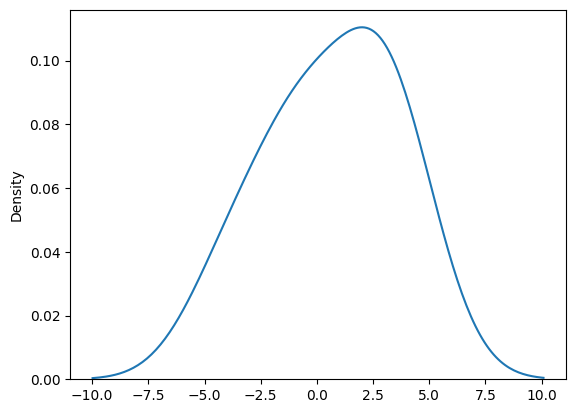

In [22]:
# random normal Data Distribution. Params: loc (mean), scale (std), size (dimensions)
import matplotlib.pyplot as plt
import seaborn as sns

normal_data = np.random.normal(loc=1, scale=2, size=(2, 3))

print(normal_data)

sns.distplot(normal_data, hist=False)

plt.show()

In [25]:
# random binomial Data Distribution. Params: n (trials), p (probability of each trial), size 
binomial_data = np.random.binomial(n=10, p=0.5, size=1000)

print(binomial_data[:20])

[3 8 6 8 4 5 6 6 7 5 5 3 3 6 6 0 7 3 7 5]


In [45]:
# empty array: The numpy.empty() function is used to create a new array of given shape and type, without initializing entries. 
# The np.empty() function creates an array without initializing its values, 
# which means that the values of the array are undefined and may vary each time the function is called.

np.empty((3,2), dtype=int)

array([[4599256793820205058, 4602222897030799646],
       [4603973650140166252, 4607013604125044074],
       [4604786795793934295, 4597554925719602060]])

In [32]:
# filtering an array based on a condition

all_numbers = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
boolean_mask = all_numbers%2==0 # check if element is even
even_numbers = all_numbers[boolean_mask]
even_numbers

array([2, 4, 6, 8])

## Broadcasting

NumPy provides a mechanism for performing mathematical operations on arrays of unequal (but compatible) shapes:

Compatibilidade de arrays:
- dimensões iguais
- um dos arrays tem dimensão 1
- adicionar 1's array de menor dimensão (prepend ones at the beginning)

In [40]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr1.shape # 2x3 

arr2 = np.random.random((2,3)) # compatible
arr3 = np.random.random((1,3)) # compatible because 1 is always compatible
arr4 = np.random.random((3,1)) # compatible because 1 is always compatible
arr5 = np.random.random((3,1)) # compatible because 1 is always compatible
arr6 = np.random.random((3,))   # its shorter, so we could prepend 1's to make equal dimensions and make compatible
arr7 = np.random.random((2,))   # prepend 1's is not solve the problem in this case because we would have (1,2), that is not compatible anyway
arr8 = np.random.random((3,2))  # not compatible dimensions (3 is greater than 2 and 2 is smaller than 3)


In [41]:
# another example
arr1 = np.array([1000, 256, 256, 256])
arr1.shape # 2x3 

arr2 = (1000, 256, 256, 256) # compatible
arr3 = (1000, 1, 256, 256) # compatible because 1 is always compatible
arr4 = (256,) # compatible because whe can prepend 1's
arr4 = (1000, 256,) # NOT compatible

In [43]:
# another example
arr1 = np.array([[1, 2, 3], 
                 [4, 5, 6],
                 [7, 8, 9]]) # 3x3 

arr2 = np.array([1, 2, 3]) # 3x1
                
# resulting array will be 3x3

arr3 = arr1 * arr2
arr3

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

#Computação Assíncrona com AsyncIO

asyncio is a library to write concurrent code using the async/await syntax.

Using asyncio in your Python code will not make your code multithreaded. 
It will not cause multiple Python instructions to be executed at once, and it will not in any way allow you to sidestep the “global interpreter lock”.

Asyncio is designed to allow you to structure your code so that when one piece of linear single-threaded code (called a “coroutine”) is waiting for something to happen another can take over and use the CPU. It’s not about using multiple cores, it’s about using a single core more efficiently.

In the asyncio world we no longer only have one stack per thread. Instead each thread has an object called an Event Loop. The event loop contains within it a list of objects called Tasks. ach Task maintains a single stack, and its own execution pointer as well. At any one time the event loop can only have one Task actually executing whilst the other tasks in the loop are all paused. If the running task gets to a point where it would have to wait for something to happen before it can continue. Then, instead of waiting, the code in the Task yields control. This means that it asks the event loop to pause the Task it is running in, and wake it up again at a future point once the thing it needs to wait for has happened.The event loop can then select one of its other sleeping tasks to wake up and become the executing task instead.

This way the CPU’s time can be shared between different tasks, all of which are executing code capable of yielding like this when they would otherwise wait.

https://bbc.github.io/cloudfit-public-docs/asyncio/asyncio-part-1.html





In [ ]:
!pip install asyncio
!pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def function_a(x):
  print(f'Processing function A')
  for i in range(0, x):
    print(f'Function A: {i}')
  print(f'Completed function A')
  
def function_b(x):
  print(f'Processing function B')
  for i in range(0, x):
    print(f'Function B: {i}')
  print(f'Completed function B')

def function_c(x):
  print(f'Processing function C')
  for i in range(0, x):
    print(f'Function C: {i}')
  print(f'Completed function C')

def synchronous_calls():
  function_a(3)
  function_b(3)
  function_c(3)

synchronous_calls()

Processing function A
Function A: 0
Function A: 1
Function A: 2
Completed function A
Processing function B
Function B: 0
Function B: 1
Function B: 2
Completed function B
Processing function C
Function C: 0
Function C: 1
Function C: 2
Completed function C


In [ ]:
# Adicione async antes da definição da função
import asyncio
import nest_asyncio

nest_asyncio.apply()

async def function_a(x):
  print(f'Processing function A')
  for i in range(0, x):
    print(f'Function A: {i}')
    await asyncio.sleep(0.3)
  print(f'Completed function A')
  

async def function_b(x):
  print(f'Processing function B')
  for i in range(0, x):
    print(f'Function B: {i}')
  await asyncio.sleep(0.2)
  print(f'Completed function B')


async def function_c(x):
  print(f'Processing function C')
  await asyncio.sleep(0.01)
  for i in range(0, x):
    print(f'Function C: {i}')
  print(f'Completed function C')


async def asynchronous_calls():
  '''
  Call the assynchronous function
  '''
  a = event_loop.create_task(function_a(3))
  b = event_loop.create_task(function_b(2))
  c = event_loop.create_task(function_c(3))
  await asyncio.wait([a, b, c])
  print('all calls completed!')


event_loop = asyncio.get_event_loop()
event_loop.run_until_complete(asynchronous_calls())
#event_loop.stop()
#event_loop.close()


Processing function A
Function A: 0
Processing function B
Function B: 0
Function B: 1
Processing function C
Function C: 0
Function C: 1
Function C: 2
Completed function C
Completed function B
Function A: 1
Function A: 2
Completed function A
all calls completed!


# Dask

É uma lib para computação paralela e distribuída.
Pode ser usada em conjunto com outras libs, como Numpy, Scykit-learn e Pandas.

Pode ser usada para dividir os dados em "chunks", processá-los individualmente e juntá-los no final (Blocked algorithms).

Parte do pressuposto que os dados e as funções são serializáveis (converting a data object into a series of bytes that saves the state of the object)



In [ ]:
!pip install dask['complete']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# dask array se refere a um ou mais múltiplos Numpy arrays organizados em um grid para computação eficiente.
# permite carregar dados maiores que a memória
# a interface do Dask é similar ao do Numpy
import dask.array as da
import numpy as np
from dask import delayed, compute

arr1 = np.random.random(10)
print('Numpy array', arr1)

dask_arr1 = da.random.random(10, chunks=3) #chunks define how many chunks the data will be divided
print('Dask array chunks: ', dask_arr1.chunks)
print('Dask array before compute: ', dask_arr1)

# dask performs lazy evaluation. Because this is necessary to call compute()
print('Dask array after compute: ', dask_arr1.compute())

# converting a np array to a da array
dask_arr1 = da.from_array(arr1, chunks=4)

# Paralelizing with @delayed

@delayed
def a(x, y):
  return x+y

@delayed
def b(x, y):
  return x*y

arr2 = np.random.random(10)
arr3 = np.random.random(10)
arr4 = np.random.random(10)

final_result = []
for i in range(0, 10):
  op1 = a(arr2[i], arr3[i])
  op2 = b(op1, arr4[i])
  final_result.append(op2)

final_computations = delayed(sum)(final_result)
print('delayed:', final_computations.compute())

Numpy array [0.34126189 0.3964627  0.83963362 0.46261035 0.47363698 0.85375253
 0.49780021 0.81105755 0.08563941 0.53692671]
Dask array chunks:  ((3, 3, 3, 1),)
Dask array before compute:  dask.array<random_sample, shape=(10,), dtype=float64, chunksize=(3,), chunktype=numpy.ndarray>
Dask array after compute:  [0.72009021 0.81108101 0.65029422 0.70060784 0.26468818 0.09248367
 0.9469761  0.62142774 0.43249618 0.24262811]
delayed: 4.555240863550399


## Parallelized Pandas with Dask

https://tutorial.dask.org/01_dataframe.html

In [ ]:
import dask.dataframe as dd

ddf = dd.read_csv('example.csv')
# S3 example: ddf = dd.read_parquet("s3://coiled-datasets/h2o-benchmark/N_1e9_K_1e2_parquet") 
ddf.compute()

,name,subtype,ATV,DRV,FPV,IDV,LPV,NFV,SQV,TPV,...,DOR,EFV,ETR,NVP,RPV,BIC,CAB,DTG,EVG,RAL
0,IF-002-438033147308-M_11676_NC_001802.1.sorted...,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,0.0,15.0,0.0,0.0,0.0,0.0,10.0,10.0


In [ ]:
x = ddf["DOR"].apply(lambda x: x + 1).compute()
# alternative: (ddf["DOR"] + 1).compute()
x

/usr/local/lib/python3.9/dist-packages/dask/dataframe/core.py:4134: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('DOR', 'float64'))

  warnings.warn(meta_warning(meta))


0    11.0
Name: DOR, dtype: float64

In [ ]:
# Example of how to split up the data into multiple files instead of a single 5 GB CSV file. 
#ddf.repartition(partition_size="100MB").to_csv("data/csvs")
#ddf = dd.read_csv("data/csvs/*.part")
#https://www.coiled.io/blog/speed-up-pandas-query-10x-with-dask

# Numba

It is a JIT (Just in Time Compiler) que pode ser utilizado para acelerar a computação de funções numéricas.

The key idea is to compile functions to native machine code instructions on the fly. The compiled code is then cached and recycled as required. When it succeeds, the compiled code is extremely fast. 

When Numba cannot infer all type information, some Python objects are given generic object status and execution falls back to the Python runtime.
When this happens, Numba provides only minor speed gains or none at all.
We generally prefer to force an error when this occurs, so we know effective compilation is failing. This is done by using @jit(nopython=True) ou the decorator @njit.

To target a function for JIT compilation we can put @jit before the function definition or envolve te function with jit() (for instance my_function = jit(my_function).

For multithreading set the parameter parallel=True inside the @jit/@njit or target='arallel' as parameter for @vectorize.

To create an universal function to Numpy vectors, use the decorator @vectorize



In [1]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
def factorial_without_numba(n):
  fact = 1
  for i in range(1, n+1):
    fact = fact * i
  return fact

In [10]:
%timeit factorial_without_numba(100000)

2.87 s ± 529 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
from numba import jit

@jit(nopython=True)
def factorial(n):
  fact = 1
  for i in range(1, n+1):
    fact = fact * i
  return fact

%timeit factorial(100000)

50 µs ± 9.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
# vectorize a function

import numpy as np

def do_some_operation_no_numba(x, y, z):
  return x + y + z

arr1 = np.array([1, 2, 3])
arr2 = np.array([[4, 5, 6], [7, 8, 9]])
c = 100


do_some_operation_no_numba(arr1, arr2, c)

array([[105, 107, 109],
       [108, 110, 112]])

In [19]:
from numba import vectorize, int64

@vectorize([int64(int64, int64, int64)]) # vectorize ( [return type( arguments types)] ) to eager compilation. Without it is a lazy compulation
def do_some_operation_no_numba(x, y, z):
  return x + y + z

do_some_operation_no_numba(arr1, arr2, c)

array([[105, 107, 109],
       [108, 110, 112]])

In [28]:
# using threads with numba

@jit
def add_numba_not_parallel(arr, n):
  return arr+n

arr3 = np.random.random(5000000)

In [29]:
%timeit add_numba_not_parallel(arr3, 2)

22.2 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
@jit(parallel=True)
def add_numba_parallel(arr, n):
  return arr+n


In [32]:
%timeit add_numba_not_parallel(arr3, 2)

18.9 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Cython (C code with Python)

It allows to use C functions, modules, types into the Python code.
It basically translate your Python code to C code. After that the translated code is compiled and bundled to be used as an extension.



In [36]:
!mkdir -p my_first_cython_code
!cd my_first_cython_code

In [47]:
!echo "print('That is all, folks!')" > my_first_cython_code/hello.pyx

In [2]:
! pip install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!cd my_first_cython_code
!echo "from setuptools import setup" >> my_first_cython_code/setup.py
!echo "from Cython.Build import cythonize" >> my_first_cython_code/setup.py
!echo "setup(ext_modules = cythonize('my_first_cython_code/hello.pyx'))" >> my_first_cython_code/setup.py
!cat my_first_cython_code/setup.py

from setuptools import setup
from Cython.Build import cythonize
setup(ext_modules = cythonize('my_first_cython_code/hello.pyx'))


In [49]:
!python my_first_cython_code/setup.py build_ext

Compiling my_first_cython_code/hello.pyx because it changed.
[1/1] Cythonizing my_first_cython_code/hello.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/my_first_cython_code/hello.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'hello' extension
creating build
creating build/temp.linux-x86_64-3.10
creating build/temp.linux-x86_64-3.10/my_first_cython_code
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.10 -c my_first_cython_code/hello.c -o build/temp.linux-x86_64-3.10/my_first_cython_code/hello.o
creating build/lib.linux-x86_64-3.10
x86_64-linux-gnu-gcc -p

In [50]:
# it created a c file
!ls -la my_first_cython_code

total 132
drwxr-xr-x 3 root root   4096 May  1 14:05 .
drwxr-xr-x 1 root root   4096 May  1 14:05 ..
-rw-r--r-- 1 root root 111680 May  1 14:05 hello.c
-rw-r--r-- 1 root root     29 May  1 14:05 hello.pyx
drwxr-xr-x 2 root root   4096 May  1 14:05 .ipynb_checkpoints
-rw-r--r-- 1 root root    129 May  1 14:05 setup.py


In [59]:
# another example
!echo "def add(n1, n2): return n1 + n2" > custom_functions.pyx
!echo "from setuptools import setup" >> setup.py
!echo "from Cython.Build import cythonize" >> setup.py
!echo "setup(ext_modules = cythonize('custom_functions.pyx'))" >> setup.py
!python setup.py build_ext --inplace

Compiling custom_functions.pyx because it changed.
[1/1] Cythonizing custom_functions.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/custom_functions.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'custom_functions' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.10 -c custom_functions.c -o build/temp.linux-x86_64-3.10/custom_functions.o
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 -Wl,-Bsymbolic-functions -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security

In [63]:
# using the cython as a module
from custom_functions import add 
add(1,5)

6

In [69]:
# no colab da para usar %%load_ext Cython

%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [71]:
%%cython
def factorial_with_cython(n):
  fact = 1
  for i in range(1, n+1):
    fact = fact * i
  return fact

In [72]:
%timeit factorial_with_cython(100000)

2.89 s ± 556 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
# o ganho de performance e observado quando adicionamos datatypes para as variaveis
# cython datatypes: int, long, unsigned short, unsigned long, float, double, string, complex types and untyped objects (threated as normal python objects)
# Examples:
# cdef int x
# cdef long y
# cdef unsigned long z
# cdef double x_db 
# cdef float x_db 
# cdef string some_string 

%%cython
def factorial_with_cython(n):
  cdef int fact = 1
  cdef int x
  for x in range(1, n+1):
    fact = fact * x
  return fact

In [74]:
%timeit factorial_with_cython(100000)

115 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
%load_ext Cython

In [8]:
# cython fuctions. Há tres tipos: def(python), cdef (pure c functions) and cpdef (hybrid)

%%cython

# cdef function: it is not accessible outside the Cython cell
cdef add(n1, n2):
  return n1 + n2

print(add(1,2))

3


In [9]:
%%cython

# cpdef function: it is  accessible outside the Cython cell
cpdef add_accessible(n1, n2):
  return n1 + n2

In [10]:
print(add_accessible(1,2))

3


In [26]:
# cython and numpy: para melhor performance, usa-se memory views, que sao ponteiros (ex. cdef int[:,:] my_2d_array)

%%cython

import numpy as np

def get_new_array(double[::] a, double[::] b):
  cdef double[::] c = np.zeros(a.size)
  cdef int i
  for i in range(0, a.size):
    c[i] = a[i] + b[i] + i
  return c

a = np.random.randn(5000)
b = np.random.randn(5000)
c = get_new_array(a, b)
print(np.asarray(c))

In [27]:
%timeit get_new_array(a, b)

23.9 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
# para otimizar ainda mais a performance do array indexing é usar:
# @boundscheck(False)
# @wraparound(False)
%%cython

import numpy as np
from cython import boundscheck, wraparound

@boundscheck(False)
@wraparound(False)
def get_new_array(double[::] a, double[::] b):
  cdef double[::] c = np.zeros(a.size)
  cdef int i
  for i in range(0, a.size):
    c[i] = a[i] + b[i] + i
  return c

a = np.random.randn(5000)
b = np.random.randn(5000)
c = get_new_array(a, b)
print(np.asarray(c))

In [29]:
%timeit get_new_array(a, b)

13.5 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
